# Electro-nuclear Generators Comparisons
### Omar Moreno, SLAC National Accelerator Laboratory
---

In [1]:
from __future__ import division

# This allows matplotlib plots to be shown inline
%matplotlib inline

import collections
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ROOT as r
import root_numpy as rnp

import logging 
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING) 


from rootpy.plotting import Hist, Hist2D, Graph

r.gStyle.SetOptStat(0)
r.gErrorIgnoreLevel = r.kWarning
r.gStyle.SetGridColor(17)
r.gStyle.SetCanvasDefW(1100)
r.gStyle.SetCanvasDefH(800)
r.gStyle.SetCanvasColor(0)
r.gStyle.SetCanvasBorderMode(0)
r.gStyle.SetCanvasBorderSize(0)
r.gStyle.SetPadBottomMargin(0.1)
r.gStyle.SetPadTopMargin(0.01)
r.gStyle.SetPadLeftMargin(0.1)
r.gStyle.SetPadRightMargin(0.14)
r.gStyle.SetPadGridX(1)
r.gStyle.SetPadGridY(1)
r.gStyle.SetPadTickX(1)
r.gStyle.SetPadTickY(1)
r.gStyle.SetFrameBorderMode(0)
r.gStyle.SetTitleOffset(1.2, "yx")
r.gStyle.SetOptLogy(1)
r.gStyle.SetTitleFontSize(25)

plt.rc('text', usetex=True)
plt.rc('grid', linestyle='--')
plt.rc('font',family='Times New Roman')
matplotlib.rc('axes', edgecolor='black')

import logging 
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING) 

canvas = r.TCanvas()


Welcome to JupyROOT 6.12/06


In [2]:
file_names = collections.OrderedDict([
    ('Geant4', 'en_geant_ntuple.root'), 
    ('GENIE',  'en_genie_ntuple.root'), 
    ('GiBUU',  'en_gibuu_ntuple.root')
])

en_ntuples      = collections.OrderedDict()
for key, value in file_names.iteritems():
    en_ntuples[key] = rnp.root2array(value, 'en_ntuple')

In [3]:
def overlay_1d_plots(ntuples, bins, variable, xlabel, **kargs):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), facecolor='white')
    
    for key, value in ntuples.iteritems():
        
        var = ntuples[key][variable]
        cut = np.ones(len(ntuples[key][variable]), dtype=bool)
        weights = np.ones(len(ntuples[key][variable]))
        
        if var.dtype == np.object_:
            var = np.hstack(var)
            weights = np.ones(len(np.hstack(var)))
            cut = np.ones(len(np.hstack(var)), dtype=bool)
        if 'cuts' in kargs:
            for c in kargs['cuts']:
                cut = cut & c[key]
        if 'weights' in kargs: 
            weights = weights*kargs['weights'][key]
            #print weights
        
        ax.hist(var[cut], bins=bins, histtype='step', linewidth=2, normed=True, label=key, weights=weights[cut])
        
    hfont = {'fontname':'Times'}
    ax.set_xlabel(xlabel, fontsize=30)
    
    ax.set_yscale("log")
    ax.minorticks_on()
    ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
    ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)
    
    #ax.grid(which='both')
    ax.legend(loc=2, fontsize=30)
    
    return ax

def draw_hist2D(x_variable, y_variable, bins_x, min_x, max_x, bins_y, min_y, max_y, cuts,**kargs): 
    
    hist = Hist2D(bins_x, min_x, max_x, bins_y, min_y, max_y)
    cut = np.ones(len(x_variable), dtype=bool)
    weights = np.ones(len(x_variable))
    for c in cuts: 
       cut = cut & c    
    
    if 'weights' in kargs: 
            weights = weights*kargs['weights']
            print weights

    a = np.column_stack((x_variable[cut], y_variable[cut]))
    
    _ = rnp.fill_hist(hist, a, weights=weights[cut])
    hist.GetXaxis().CenterTitle()
    hist.GetYaxis().CenterTitle()
    
    return hist
    

In [4]:
theta_slice_0_10     = collections.OrderedDict()
theta_slice_10_20    = collections.OrderedDict()
theta_slice_20_30    = collections.OrderedDict()
theta_slice_30_40    = collections.OrderedDict()
theta_slice_40_50    = collections.OrderedDict()
theta_slice_50_60    = collections.OrderedDict()
theta_slice_60_70    = collections.OrderedDict()
theta_slice_70_80    = collections.OrderedDict()

q_cut = collections.OrderedDict()
qh_cut = collections.OrderedDict()

omega_cut = collections.OrderedDict()
omegah_cut = collections.OrderedDict()

pt_cut = collections.OrderedDict()
pth_cut = collections.OrderedDict()

weights = collections.OrderedDict()
weight_cut = collections.OrderedDict()
hweight = collections.OrderedDict()
hweight_cut = collections.OrderedDict()

pi_cut = collections.OrderedDict()
proton_cut = collections.OrderedDict()

for key, value in en_ntuples.iteritems():
    theta_slice_0_10[key]  = (value['recoil_e_theta'] >= 0)  & (value['recoil_e_theta'] < 10)
    theta_slice_10_20[key] = (value['recoil_e_theta'] >= 10) & (value['recoil_e_theta'] < 20)
    theta_slice_20_30[key] = (value['recoil_e_theta'] >= 20) & (value['recoil_e_theta'] < 30)
    theta_slice_30_40[key] = (value['recoil_e_theta'] >= 30) & (value['recoil_e_theta'] < 40)
    theta_slice_40_50[key] = (value['recoil_e_theta'] >= 40) & (value['recoil_e_theta'] < 50)
    theta_slice_50_60[key] = (value['recoil_e_theta'] >= 50) & (value['recoil_e_theta'] < 60)
    theta_slice_60_70[key] = (value['recoil_e_theta'] >= 60) & (value['recoil_e_theta'] < 70)
    theta_slice_70_80[key] = (value['recoil_e_theta'] >= 70) & (value['recoil_e_theta'] < 80)
    
    q_cut[key] = value['q'] > 173
    omega_cut[key] = value['omega'] > 1000
    pt_cut[key] = value['recoil_e_pt'] > 200
    
    weights[key] = value['event_weight']
    weight_cut[key] = ((value['event_weight'] >= 0) & (value['event_weight'] <= 1))
    hweight[key] = np.hstack(value['hadron_ew'])*np.hstack(value['hadron_weight'])
    hweight_cut[key] = (np.hstack(value['hadron_ew']) >= 0) & (np.hstack(value['hadron_ew']) <= 1)
    
    omegah_cut[key] = np.hstack(value['hadron_omega']) > 1000
    qh_cut[key] = np.hstack(value['hadron_q']) > 173
    pth_cut[key] = np.hstack(value['hadron_recoil_pt']) > 200
    pi_cut[key] = np.abs(np.hstack(value['hadron_pdgid'])) == 211
    proton_cut[key] = np.abs(np.hstack(value['hadron_pdgid'])) == 2112
    
    

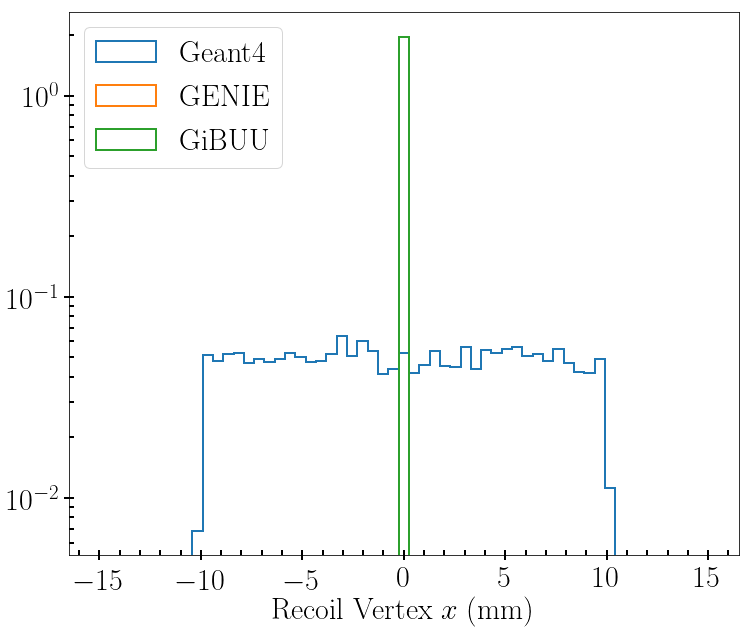

In [5]:
ax = overlay_1d_plots(en_ntuples, np.linspace(-15, 15, 60), 'recoil_e_vx', 'Recoil Vertex $x$ (mm)');

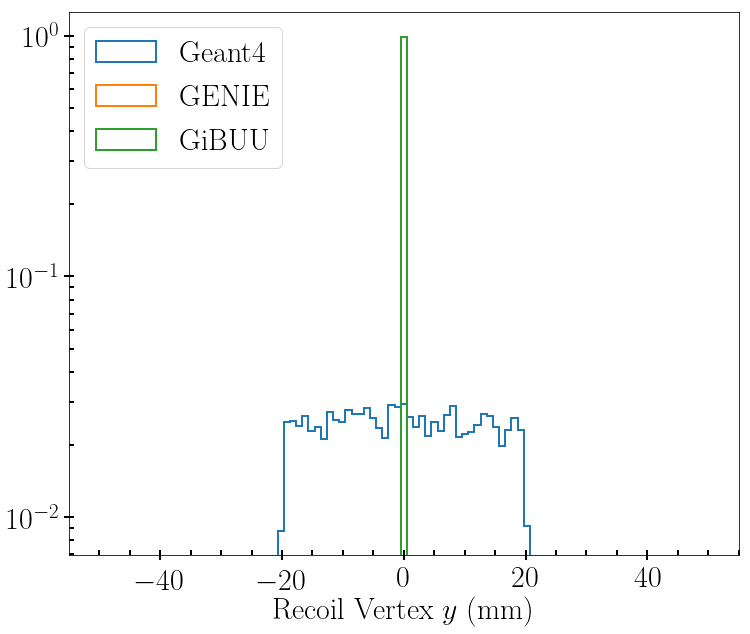

In [6]:
ax = overlay_1d_plots(en_ntuples, np.linspace(-50, 50, 100), 'recoil_e_vy', 'Recoil Vertex $y$ (mm)')

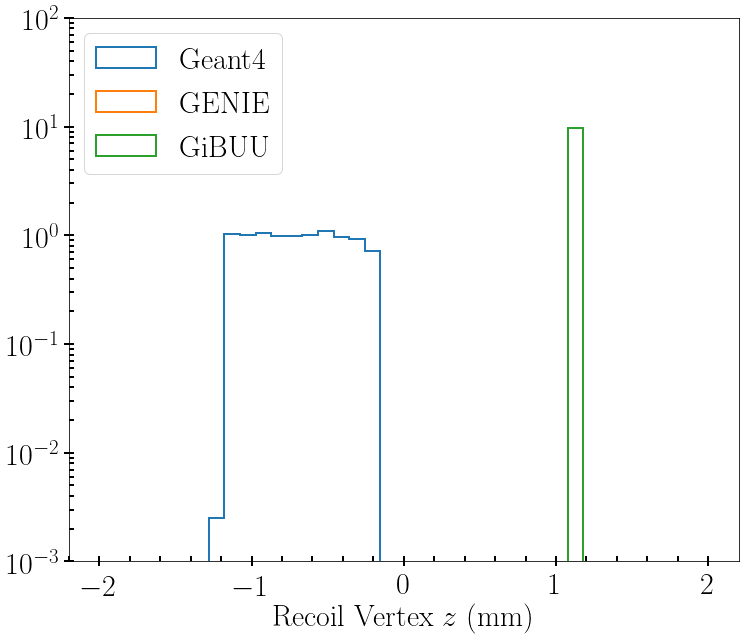

In [7]:
ax = overlay_1d_plots(en_ntuples, np.linspace(-2, 2, 40), 'recoil_e_vz', 'Recoil Vertex $z$ (mm)')
ax.set_ylim(1e-3, 100);

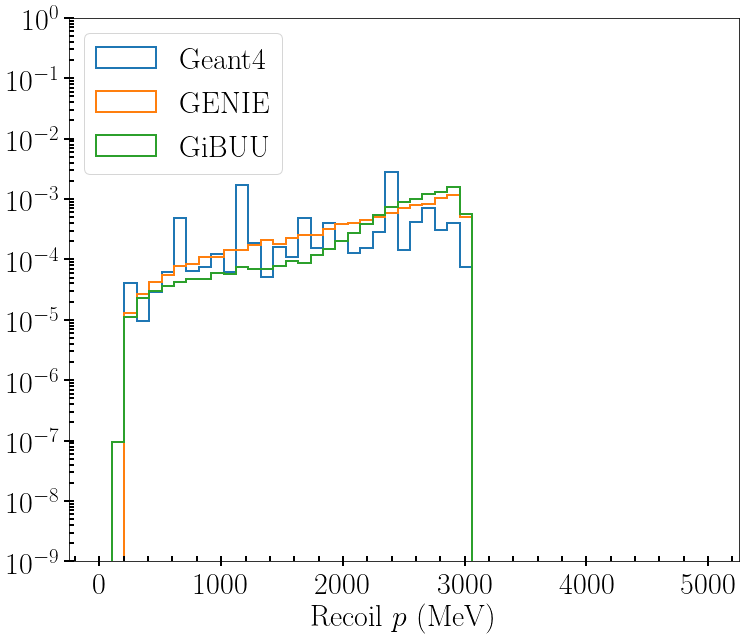

In [8]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 50), 'recoil_e_p', 'Recoil $p$ (MeV)', cuts=[q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.set_ylim(1e-9, 1);

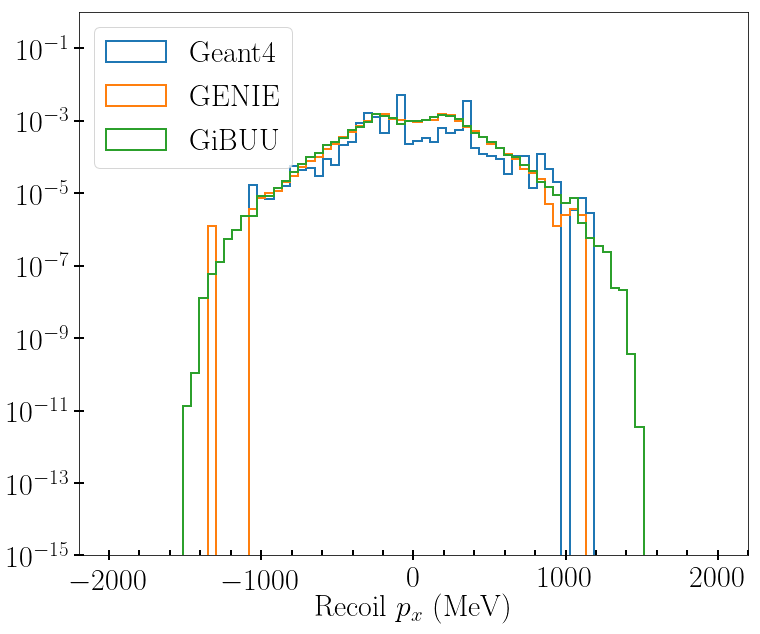

In [9]:
ax = overlay_1d_plots(en_ntuples, np.linspace(-2000, 2000, 75), 'recoil_e_px', 'Recoil $p_{x}$ (MeV)', 
                      cuts=[q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.set_ylim(1e-15, 1);

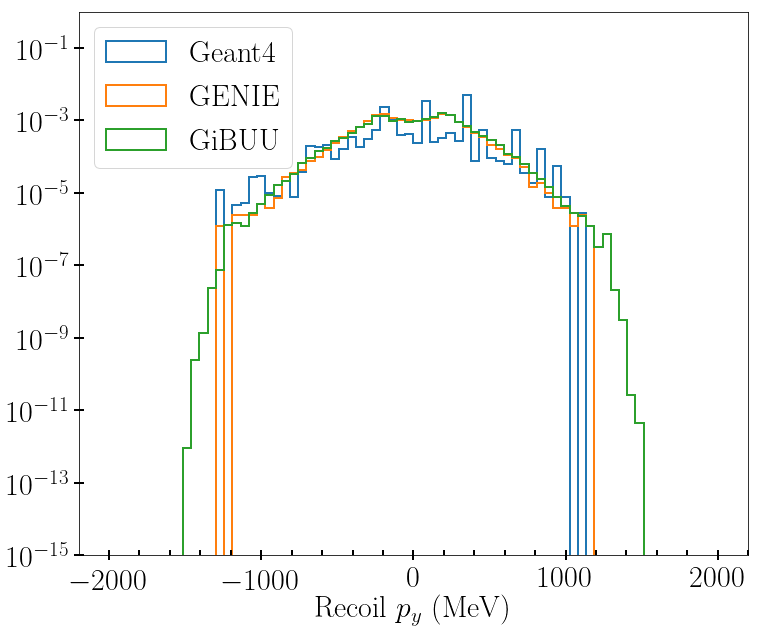

In [10]:
ax = overlay_1d_plots(en_ntuples, np.linspace(-2000, 2000, 75), 'recoil_e_py', 'Recoil $p_{y}$ (MeV)', 
                      cuts=[q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.set_ylim(1e-15, 1);

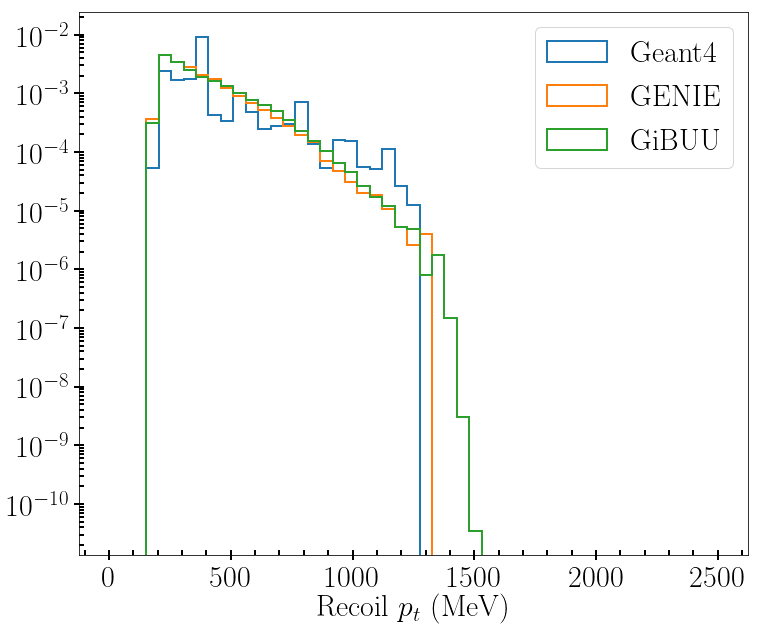

In [11]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 2500, 50), 'recoil_e_pt', 'Recoil $p_{t}$ (MeV)', 
                      cuts=[q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.legend(loc=1, fontsize=30);

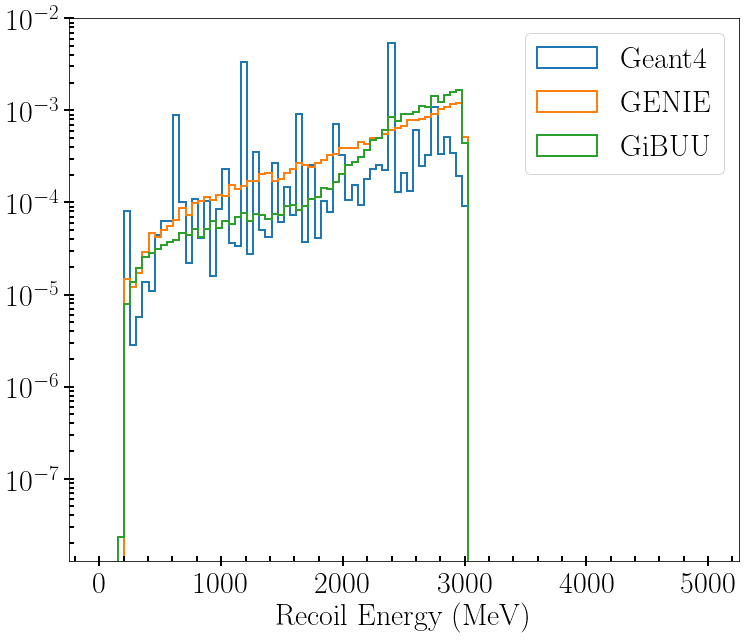

In [12]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'recoil_e_energy', 'Recoil Energy (MeV)', 
                      cuts=[q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.legend(loc=1, fontsize=30);

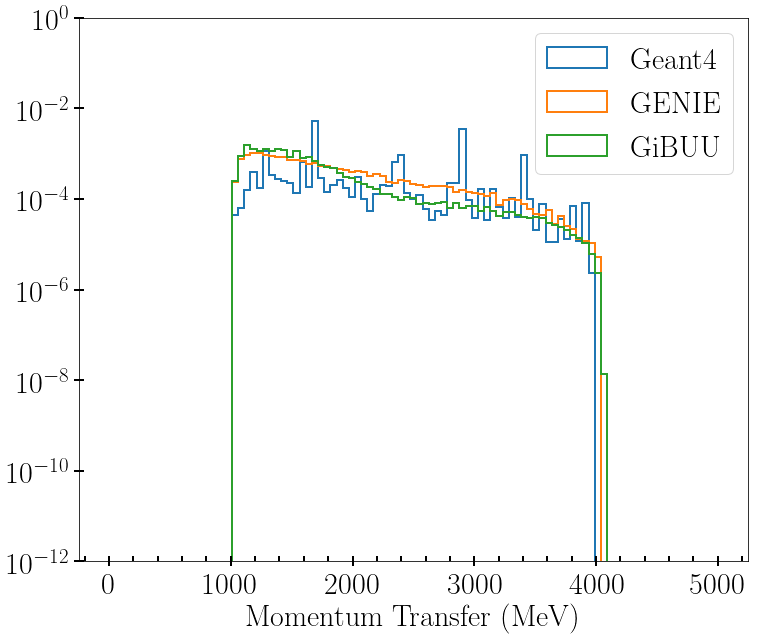

In [13]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'q', 'Momentum Transfer (MeV)', 
                      cuts=[q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.legend(loc=1, fontsize=30)
ax.set_ylim(1e-12, 1);

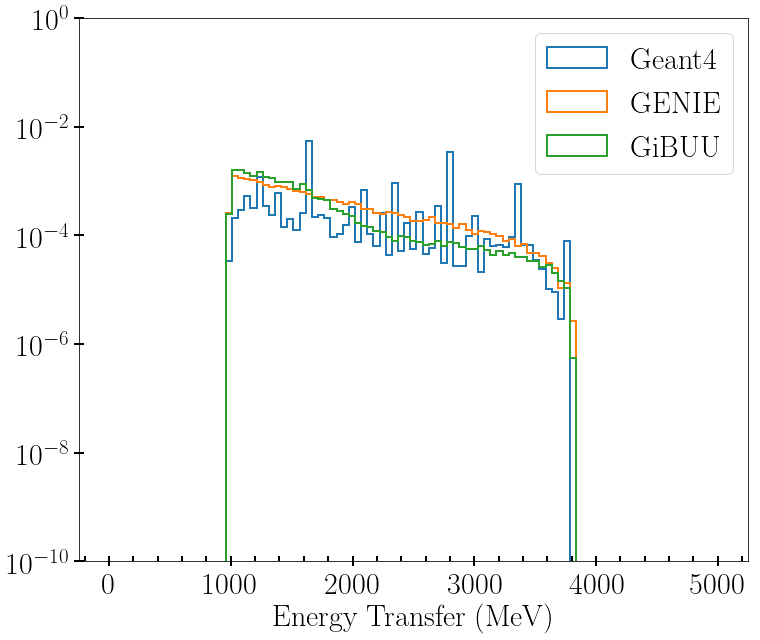

In [14]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'omega', 'Energy Transfer (MeV)', 
                      cuts=[q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.legend(loc=1, fontsize=30)
ax.set_ylim(1e-10, 1);

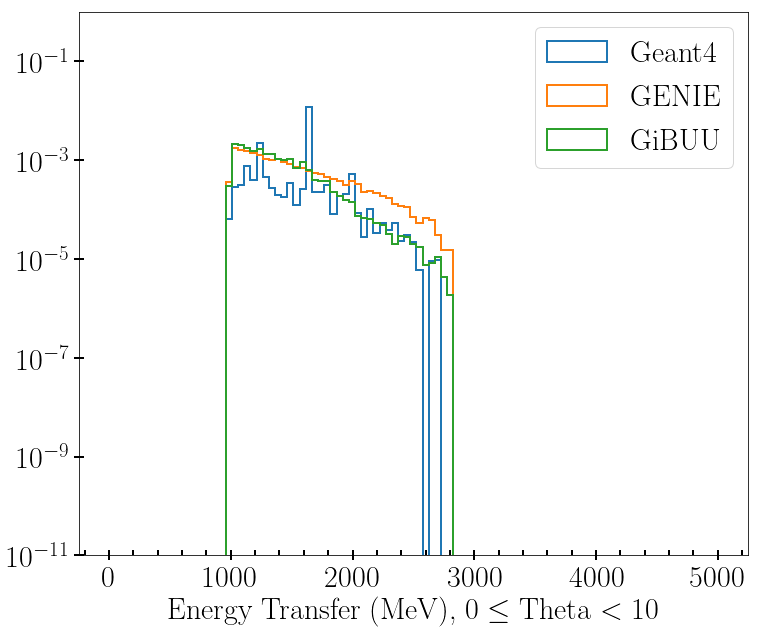

In [15]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'omega', 'Energy Transfer (MeV), $0 \leq$ Theta $< 10$', 
                      cuts=[theta_slice_0_10, q_cut, q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.legend(loc=1, fontsize=30)
ax.set_ylim(1e-11, 1);

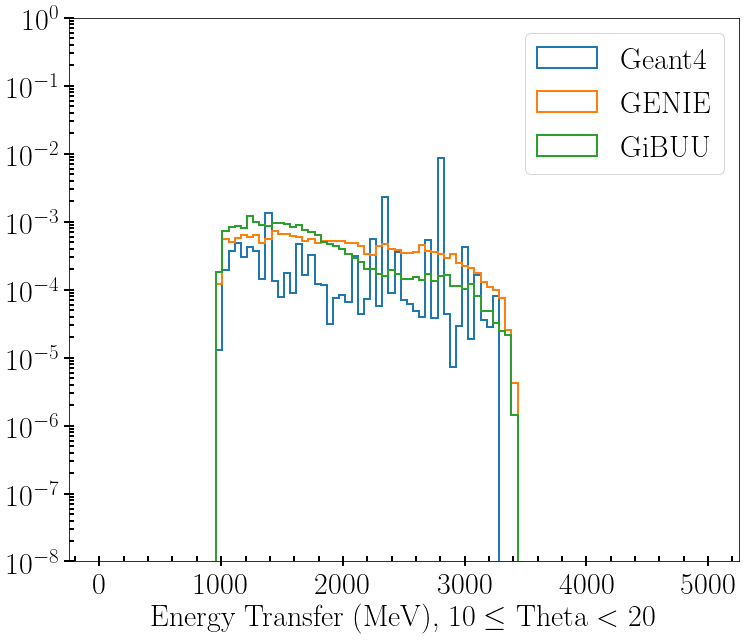

In [16]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'omega', 'Energy Transfer (MeV), $10 \leq$ Theta $< 20$', 
                      cuts=[theta_slice_10_20, q_cut, q_cut, q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.legend(loc=1, fontsize=30)
ax.set_ylim(1e-8, 1);

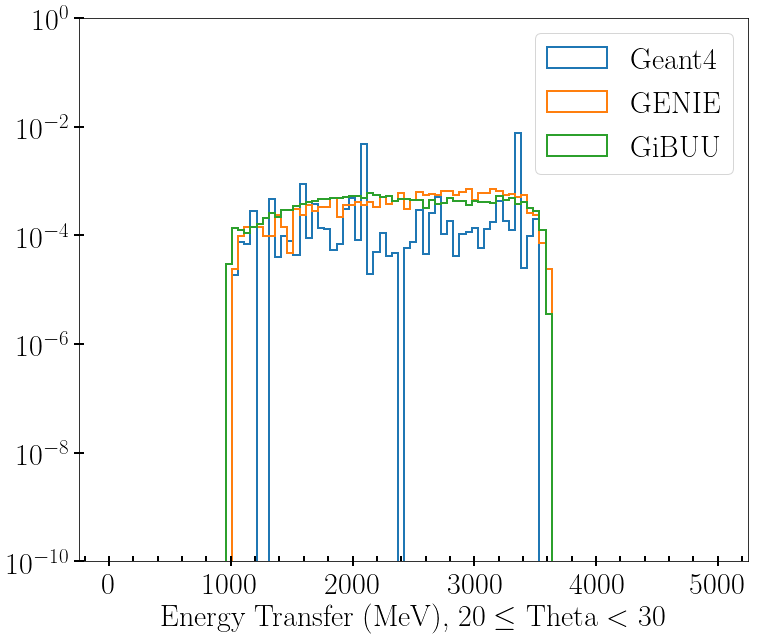

In [17]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'omega', 'Energy Transfer (MeV), $20 \leq$ Theta $< 30$', 
                      cuts=[theta_slice_20_30, q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.legend(loc=1, fontsize=30)
ax.set_ylim(1e-10, 1);

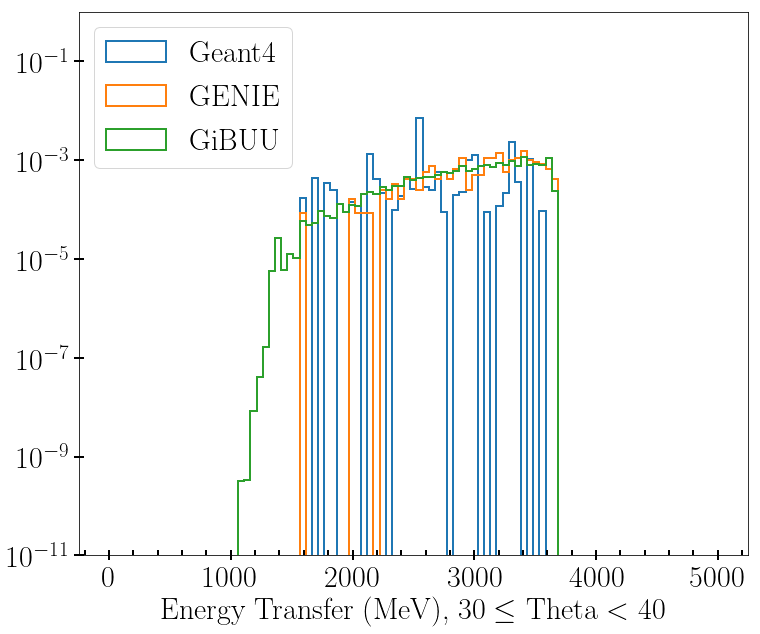

In [18]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'omega', 'Energy Transfer (MeV), $30 \leq$ Theta $< 40$', 
                      cuts=[theta_slice_30_40, q_cut, pt_cut, omega_cut, weight_cut], weights=weights)
ax.legend(loc=2, fontsize=30)
ax.set_ylim(1e-11, 1);

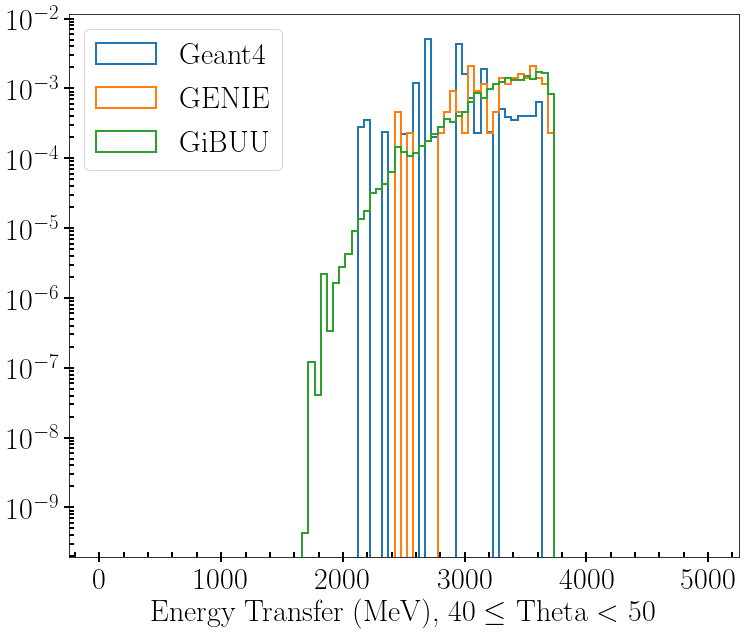

In [19]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'omega', 'Energy Transfer (MeV), $40 \leq$ Theta $< 50$', 
                      cuts=[theta_slice_40_50, q_cut, pt_cut, omega_cut, weight_cut], weights=weights)


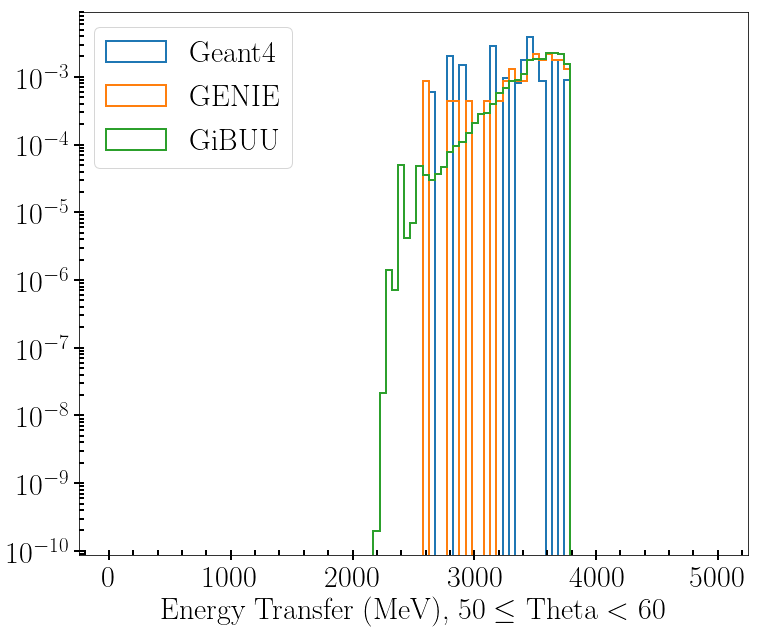

In [20]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'omega', 'Energy Transfer (MeV), $50 \leq$ Theta $< 60$', 
                      cuts=[theta_slice_50_60, q_cut, pt_cut, omega_cut, weight_cut], weights=weights)

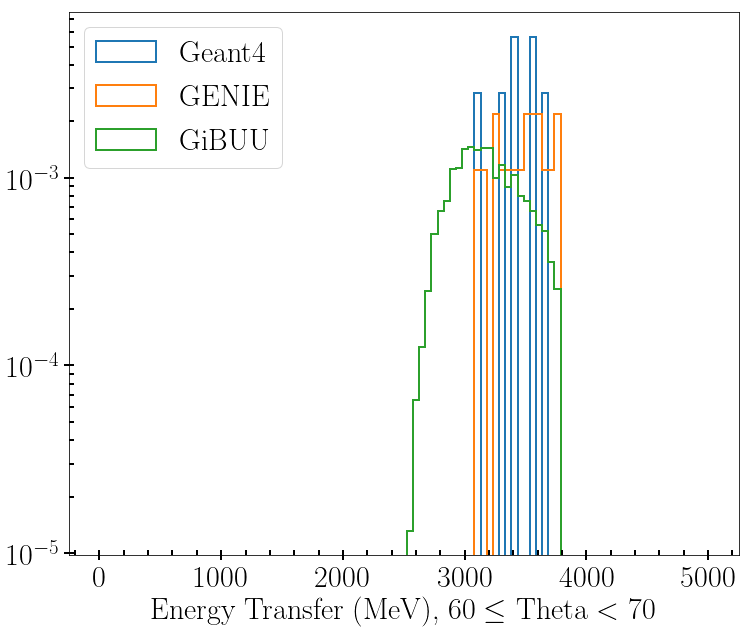

In [21]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'omega', 'Energy Transfer (MeV), $60 \leq$ Theta $< 70$', 
                      cuts=[theta_slice_60_70, q_cut, pt_cut, omega_cut, weight_cut])

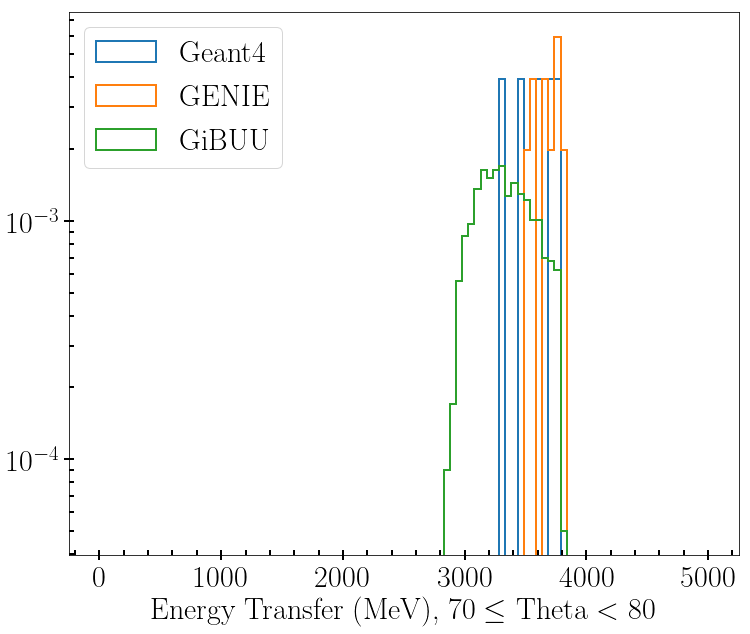

In [22]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 5000, 100), 'omega', 'Energy Transfer (MeV), $70 \leq$ Theta $< 80$', 
                      cuts=[theta_slice_70_80, q_cut, pt_cut, omega_cut, weight_cut])

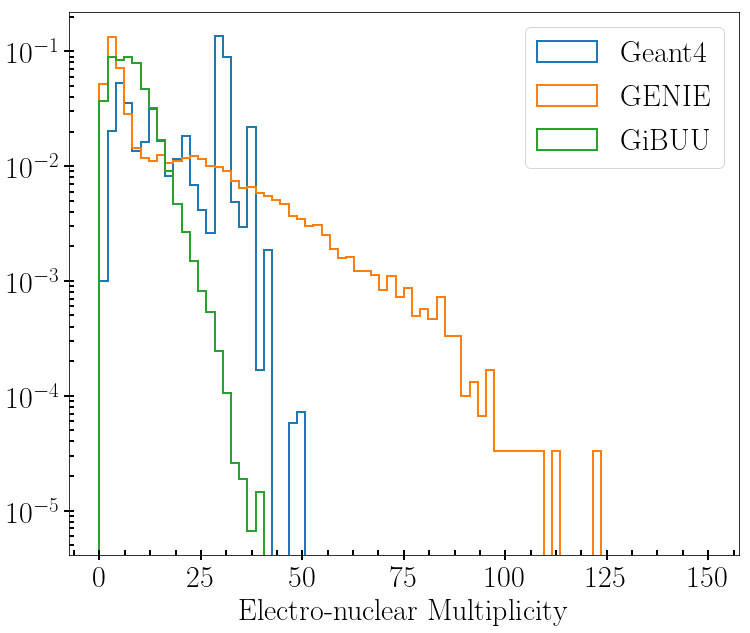

In [23]:
ax = overlay_1d_plots(en_ntuples, np.linspace(0, 150, 75), 'en_particle_mult', 'Electro-nuclear Multiplicity', 
                      cuts=[q_cut, weight_cut, pt_cut, omega_cut], weights=weights)
ax.legend(loc=1, fontsize=30)

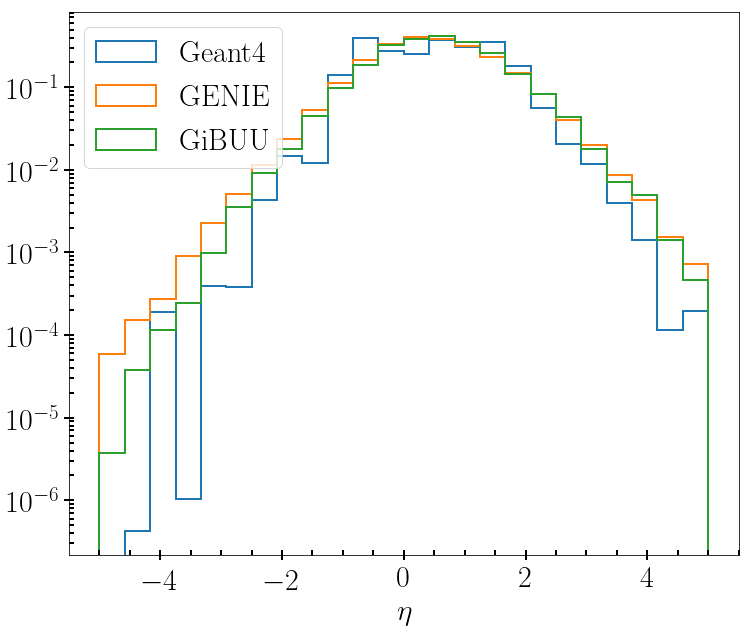

In [24]:
ax = overlay_1d_plots(en_ntuples, np.linspace(-5, 5 , 25), 'hadron_eta', '$\eta$', 
                      cuts=[qh_cut, pth_cut, omegah_cut], 
                      weights=hweight)
ax.legend(loc=2, fontsize=30)

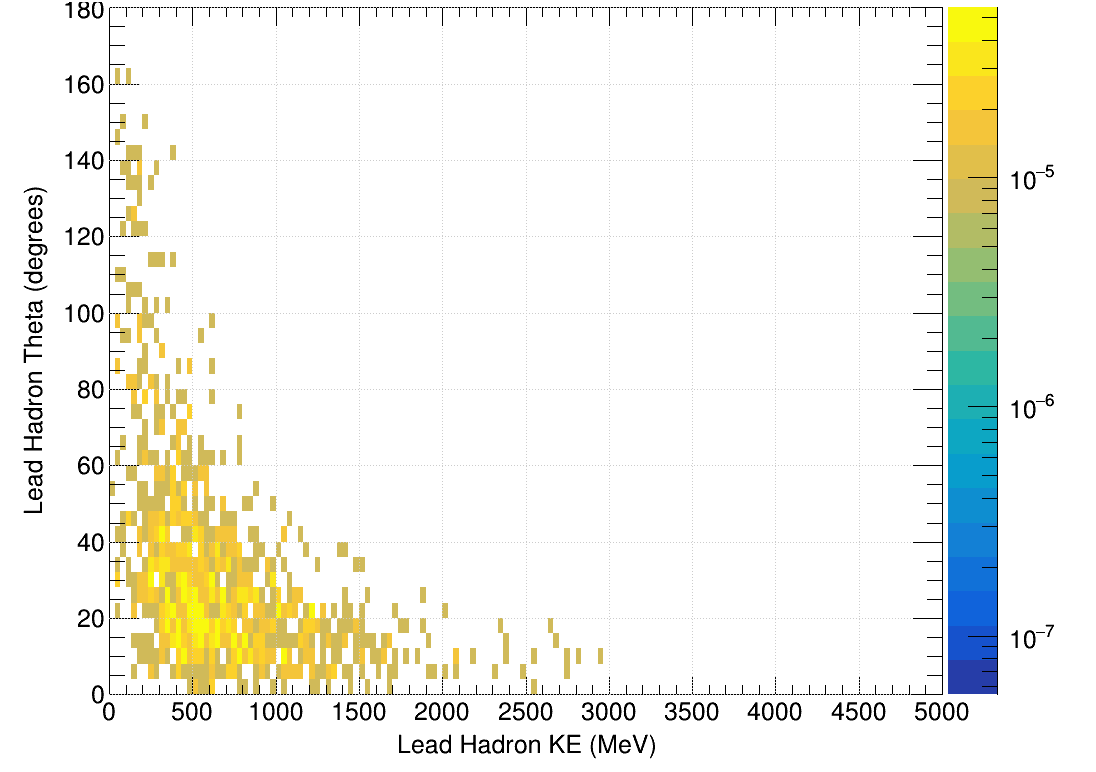

In [25]:
hist = draw_hist2D(en_ntuples['Geant4']['lead_hadron_ke'], en_ntuples['Geant4']['lead_hadron_theta']*180/math.pi, 
                   150, 0, 5000, 45, 0, 180, [q_cut['Geant4'], omega_cut['Geant4'], pt_cut['Geant4']])
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Lead Hadron KE (MeV)')
hist.GetYaxis().SetTitle('Lead Hadron Theta (degrees)')
hist.SetTitle('Geant4')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

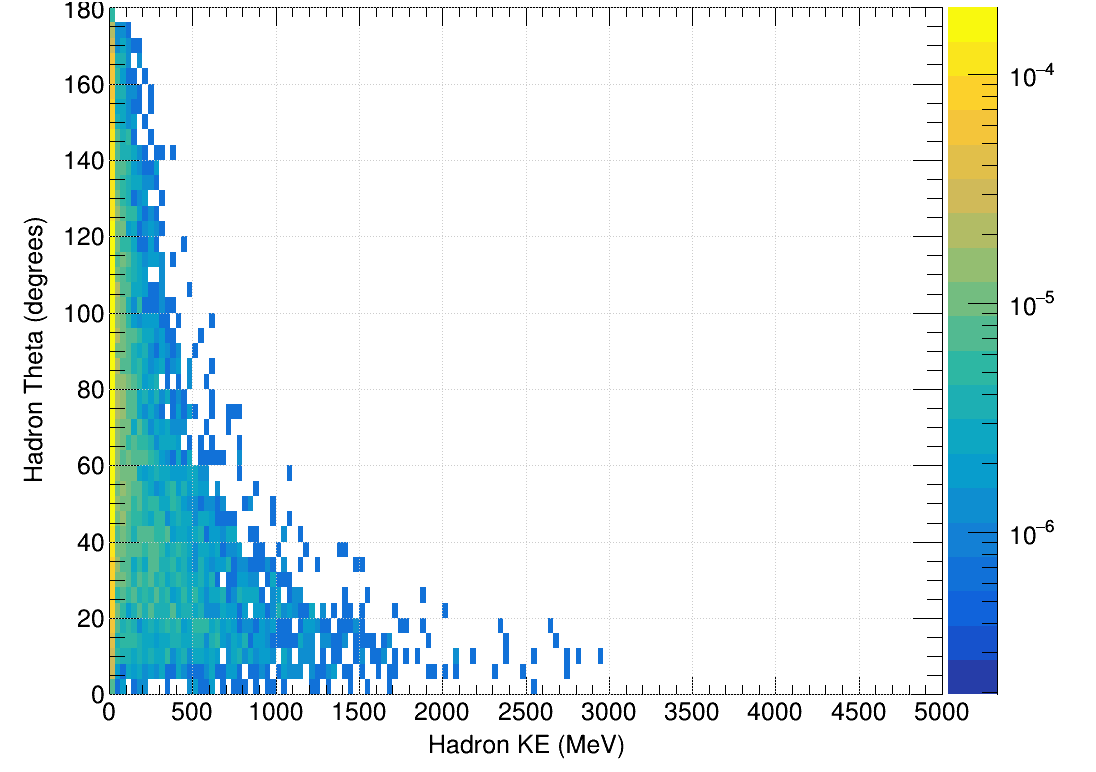

In [26]:
hist = draw_hist2D(np.hstack(en_ntuples['Geant4']['hadron_ke']), 
                   np.hstack(en_ntuples['Geant4']['hadron_theta'])*180/math.pi, 
                   150, 0, 5000, 45, 0, 180, [qh_cut['Geant4'], omegah_cut['Geant4'], pth_cut['Geant4']])
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Hadron KE (MeV)')
hist.GetYaxis().SetTitle('Hadron Theta (degrees)')
hist.SetTitle('Geant4')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

[1. 1. 1. ... 1. 1. 1.]


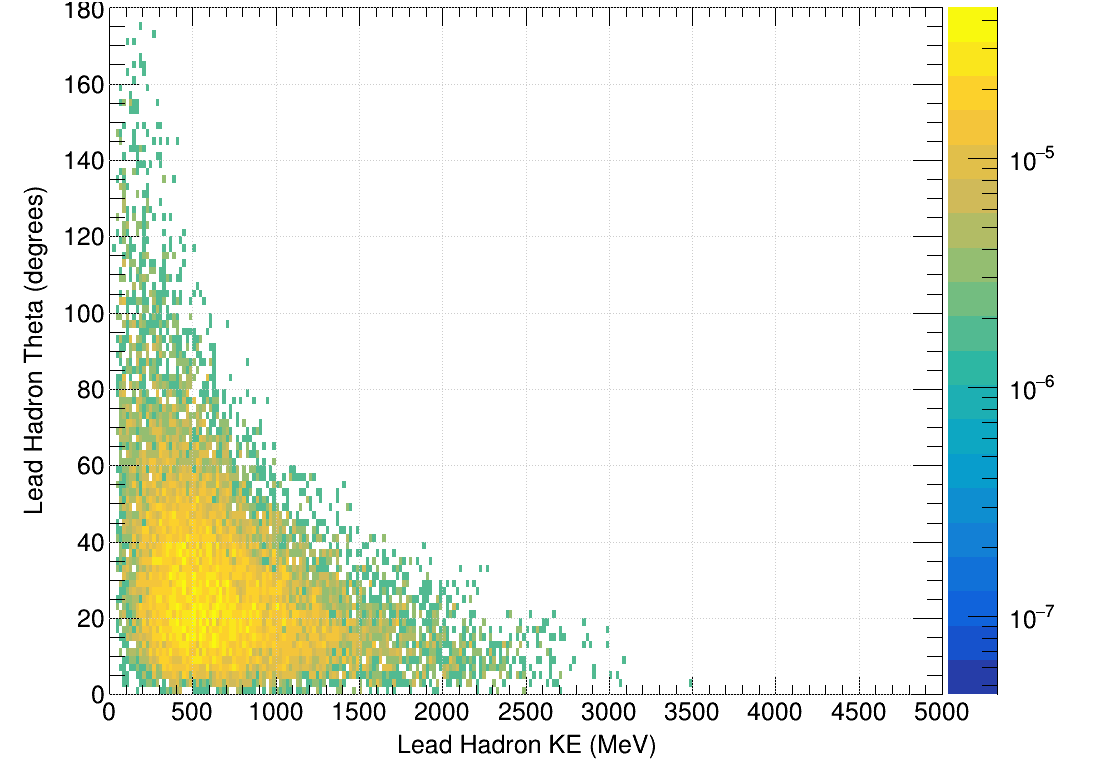

In [27]:
hist = draw_hist2D(en_ntuples['GENIE']['lead_hadron_ke'], en_ntuples['GENIE']['lead_hadron_theta']*180/math.pi,
                   250, 0, 5000, 90, 0, 180,
                   [q_cut['GENIE'], weight_cut['GENIE'], omega_cut['GENIE'], pt_cut['GENIE']], weights=weights['GENIE'])
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Lead Hadron KE (MeV)')
hist.GetYaxis().SetTitle('Lead Hadron Theta (degrees)')
hist.SetTitle('GENIE')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

[ 0.00017884  0.0032347  -0.00065207 ...  0.00032084  0.00019025
  0.00025806]


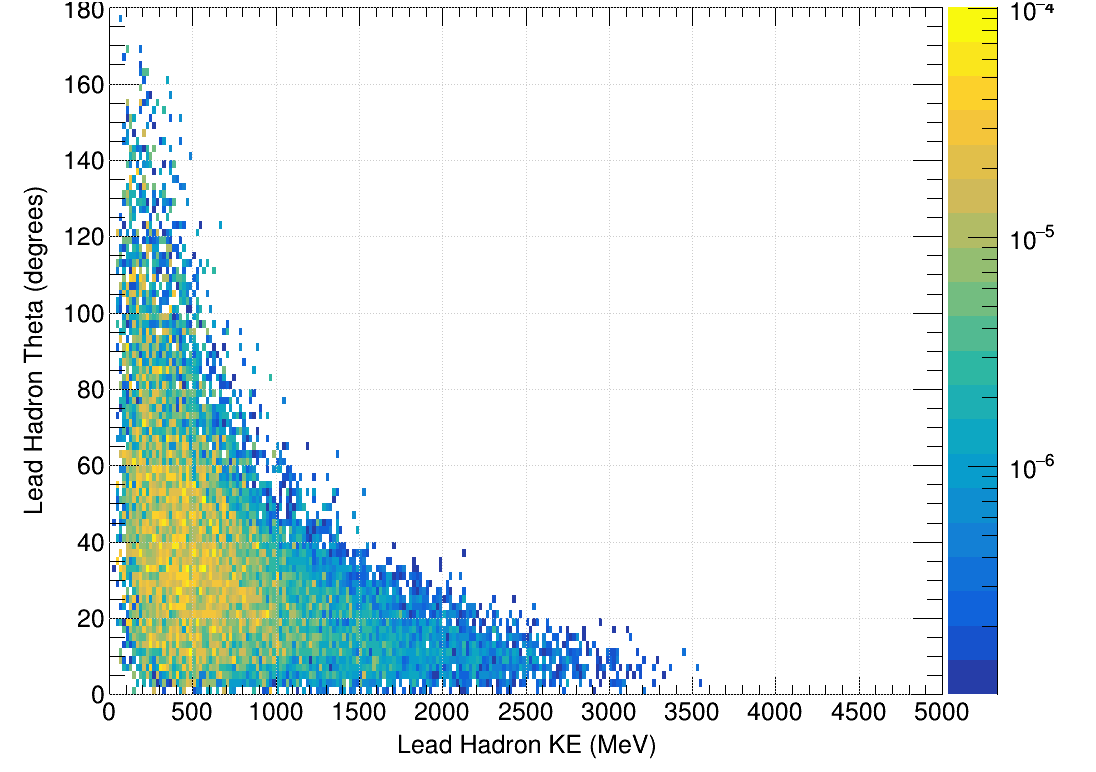

In [28]:
hist = draw_hist2D(en_ntuples['GiBUU']['lead_hadron_ke'], en_ntuples['GiBUU']['lead_hadron_theta']*180/math.pi, 
                   250, 0, 5000, 90, 0, 180, 
                   [q_cut['GiBUU'], weight_cut['GiBUU'], omega_cut['GiBUU'], pt_cut['GiBUU']], weights=weights['GiBUU'])
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Lead Hadron KE (MeV)')
hist.GetYaxis().SetTitle('Lead Hadron Theta (degrees)')
hist.SetTitle('GiBUU')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

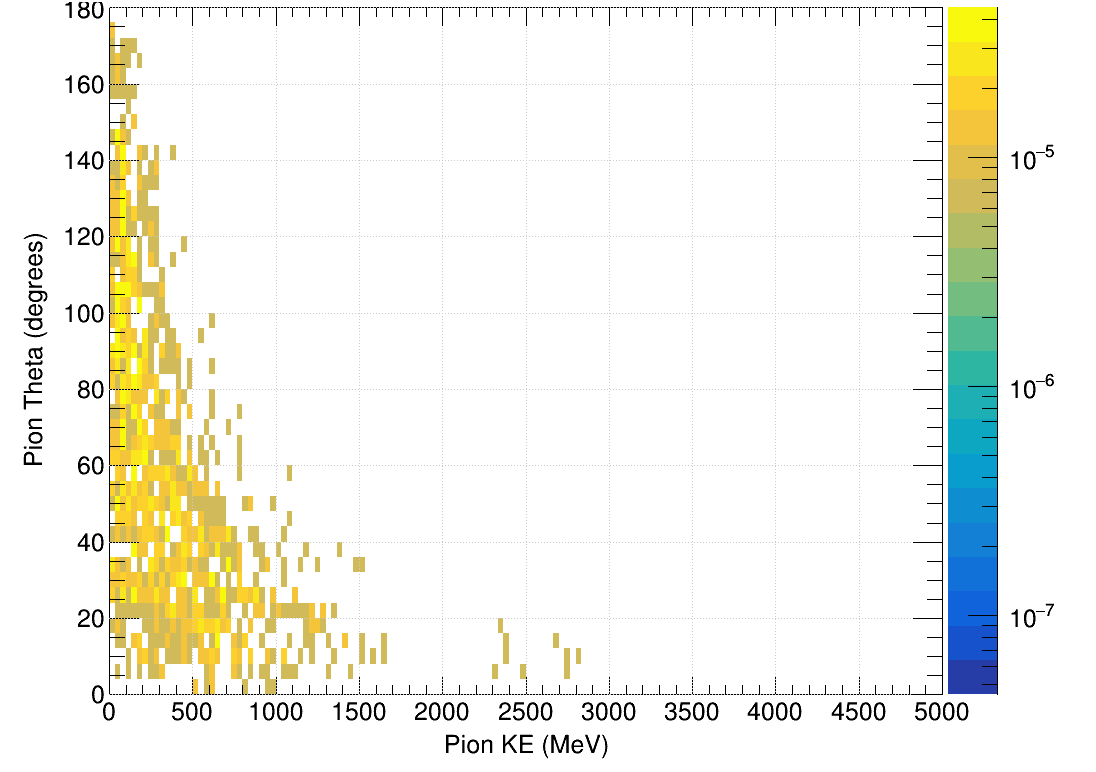

In [29]:
hist = draw_hist2D(np.hstack(en_ntuples['Geant4']['hadron_ke']), 
                   np.hstack(en_ntuples['Geant4']['hadron_theta'])*180/math.pi, 
                   150, 0, 5000, 45, 0, 180, [qh_cut['Geant4'], omegah_cut['Geant4'], pth_cut['Geant4'], pi_cut['Geant4']])
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Pion KE (MeV)')
hist.GetYaxis().SetTitle('Pion Theta (degrees)')
hist.SetTitle('Geant4')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

[1. 1. 1. ... 1. 1. 1.]


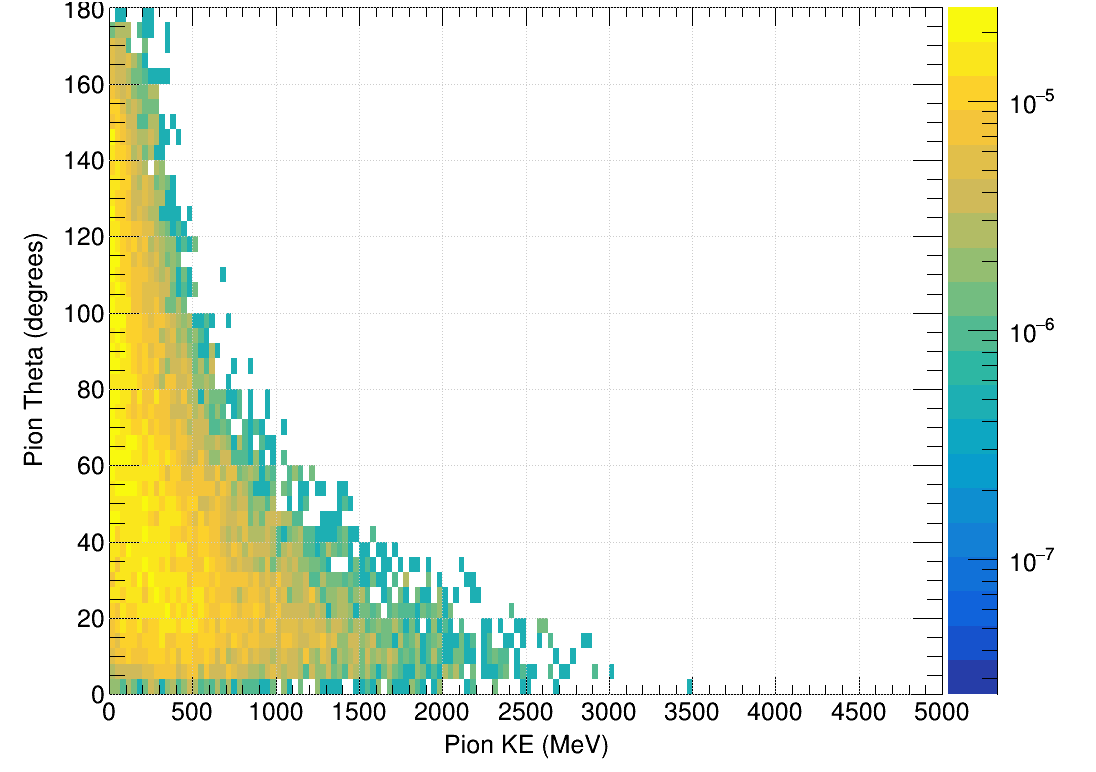

In [30]:
hist = draw_hist2D(np.hstack(en_ntuples['GENIE']['hadron_ke']), 
                   np.hstack(en_ntuples['GENIE']['hadron_theta'])*180/math.pi, 
                   150, 0, 5000, 45, 0, 180, [qh_cut['GENIE'], omegah_cut['GENIE'], pth_cut['GENIE'], pi_cut['GENIE']], 
                   weights=np.hstack(en_ntuples['GENIE']['hadron_ew']))
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Pion KE (MeV)')
hist.GetYaxis().SetTitle('Pion Theta (degrees)')
hist.SetTitle('GENIE')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

[0.00017884 0.00017884 0.00017884 ... 0.00025806 0.00025806 0.00025806]


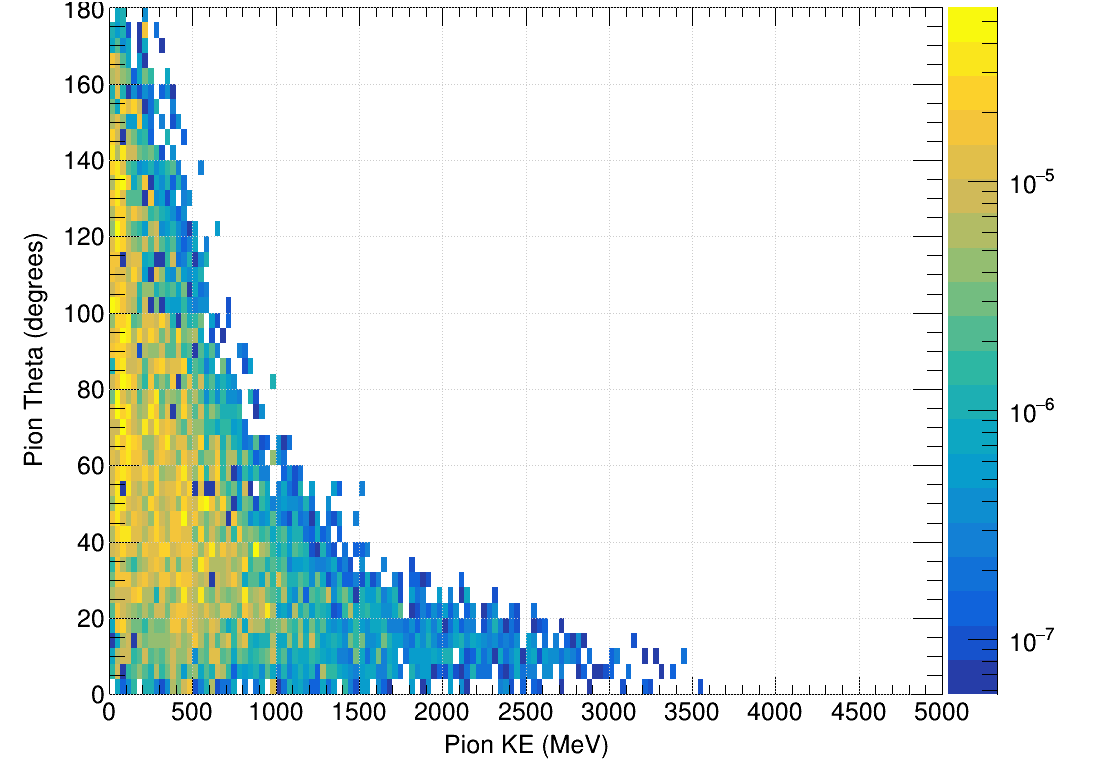

In [31]:
hist = draw_hist2D(np.hstack(en_ntuples['GiBUU']['hadron_ke']), 
                   np.hstack(en_ntuples['GiBUU']['hadron_theta'])*180/math.pi, 
                   150, 0, 5000, 45, 0, 180, [qh_cut['GiBUU'], omegah_cut['GiBUU'], pth_cut['GiBUU'], pi_cut['GiBUU']],
                   weights=np.hstack(en_ntuples['GiBUU']['hadron_ew'])
                  )
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Pion KE (MeV)')
hist.GetYaxis().SetTitle('Pion Theta (degrees)')
hist.SetTitle('GiBUU')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

[0.00017884 0.00017884 0.00017884 ... 0.00025806 0.00025806 0.00025806]


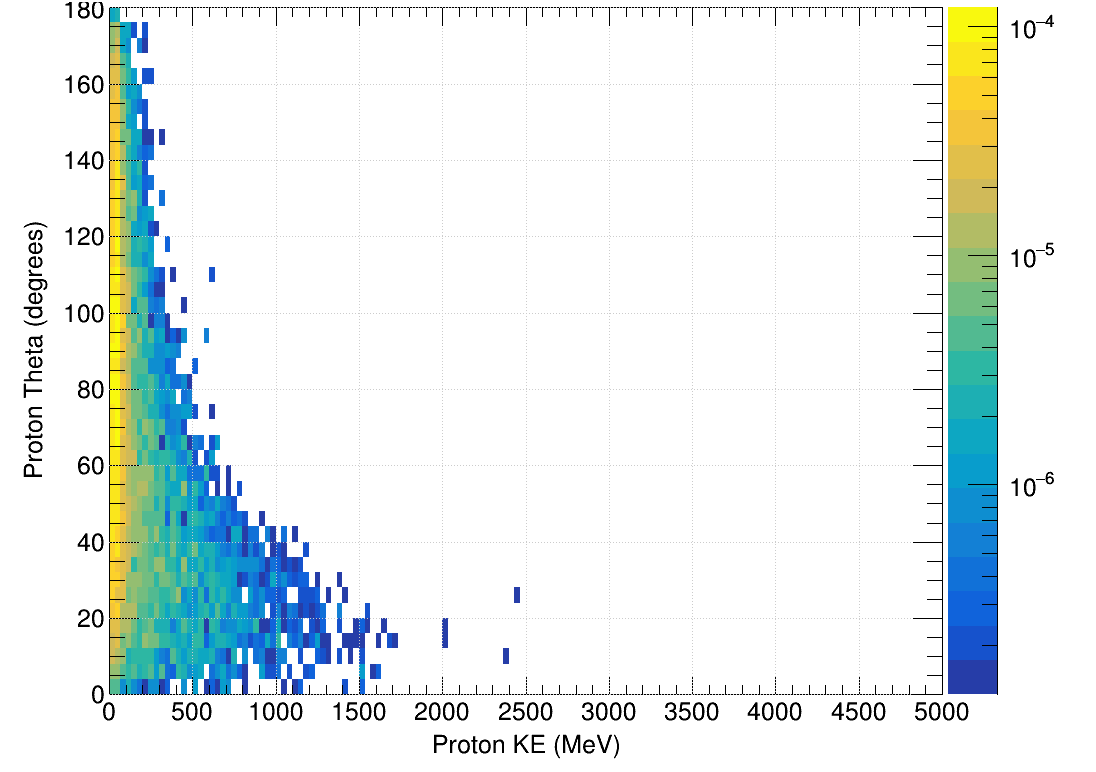

In [32]:
hist = draw_hist2D(np.hstack(en_ntuples['GiBUU']['hadron_ke']), 
                   np.hstack(en_ntuples['GiBUU']['hadron_theta'])*180/math.pi, 
                   150, 0, 5000, 45, 0, 180, [qh_cut['GiBUU'], omegah_cut['GiBUU'], pth_cut['GiBUU'], proton_cut['GiBUU']],
                   weights=np.hstack(en_ntuples['GiBUU']['hadron_ew'])
                  )
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Proton KE (MeV)')
hist.GetYaxis().SetTitle('Proton Theta (degrees)')
hist.SetTitle('GiBUU')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

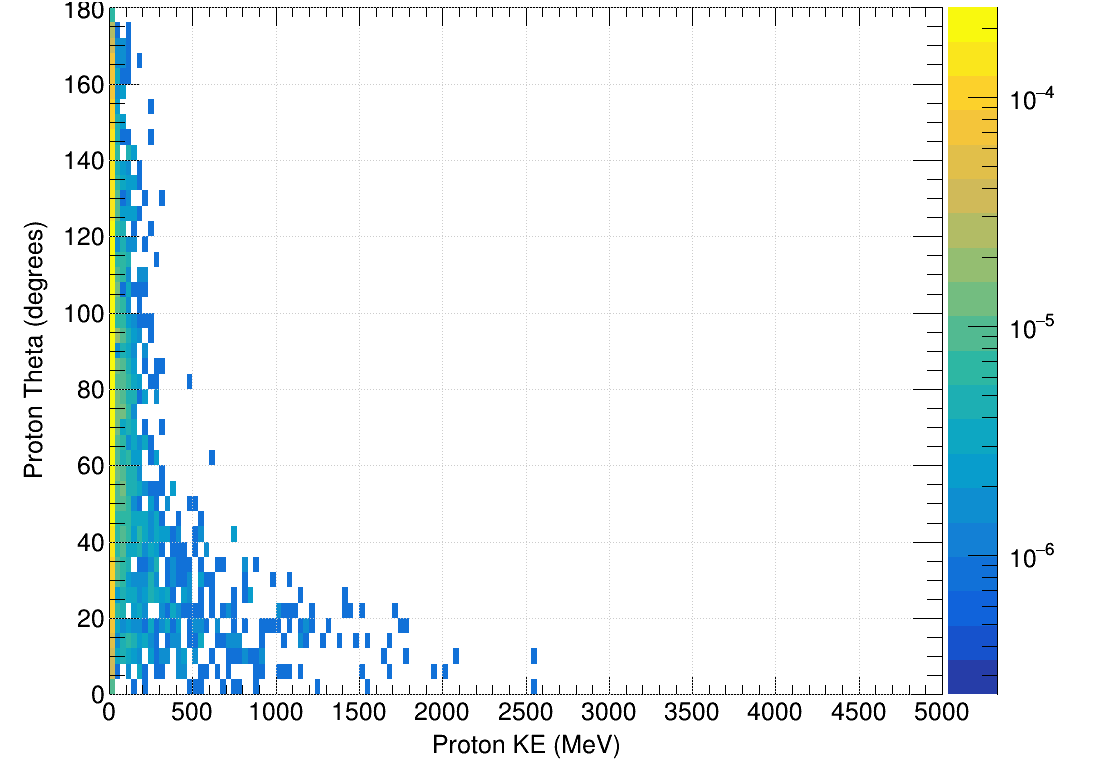

In [33]:
hist = draw_hist2D(np.hstack(en_ntuples['Geant4']['hadron_ke']), 
                   np.hstack(en_ntuples['Geant4']['hadron_theta'])*180/math.pi, 
                   150, 0, 5000, 45, 0, 180, [qh_cut['Geant4'], omegah_cut['Geant4'], pth_cut['Geant4'], proton_cut['Geant4']])
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Proton KE (MeV)')
hist.GetYaxis().SetTitle('Proton Theta (degrees)')
hist.SetTitle('Geant4')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

[1. 1. 1. ... 1. 1. 1.]


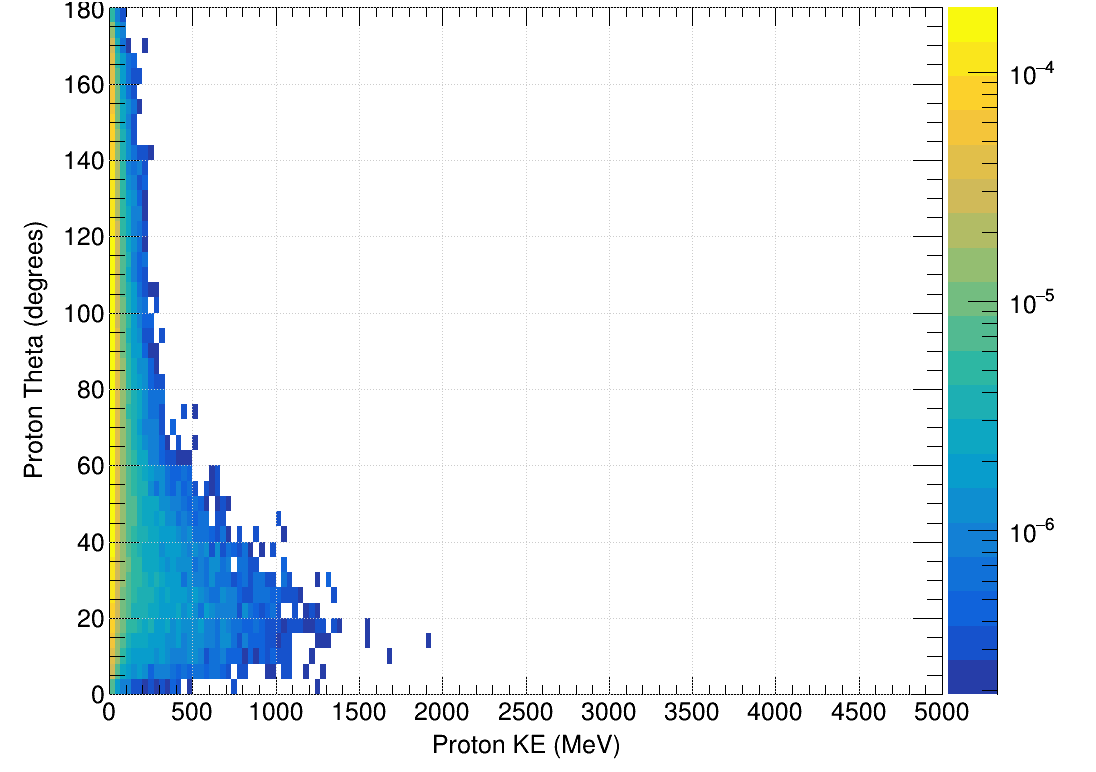

In [34]:
hist = draw_hist2D(np.hstack(en_ntuples['GENIE']['hadron_ke']), 
                   np.hstack(en_ntuples['GENIE']['hadron_theta'])*180/math.pi, 
                   150, 0, 5000, 45, 0, 180, [qh_cut['GENIE'], omegah_cut['GENIE'], pth_cut['GENIE'], proton_cut['GENIE']], 
                   weights=np.hstack(en_ntuples['GENIE']['hadron_ew']))
hist.Scale(1/hist.Integral(), "width")
hist.Draw("colz")
hist.GetXaxis().SetTitle('Proton KE (MeV)')
hist.GetYaxis().SetTitle('Proton Theta (degrees)')
hist.SetTitle('GENIE')

canvas.SetLogy(0)
canvas.SetLogz(1)
canvas.Draw()

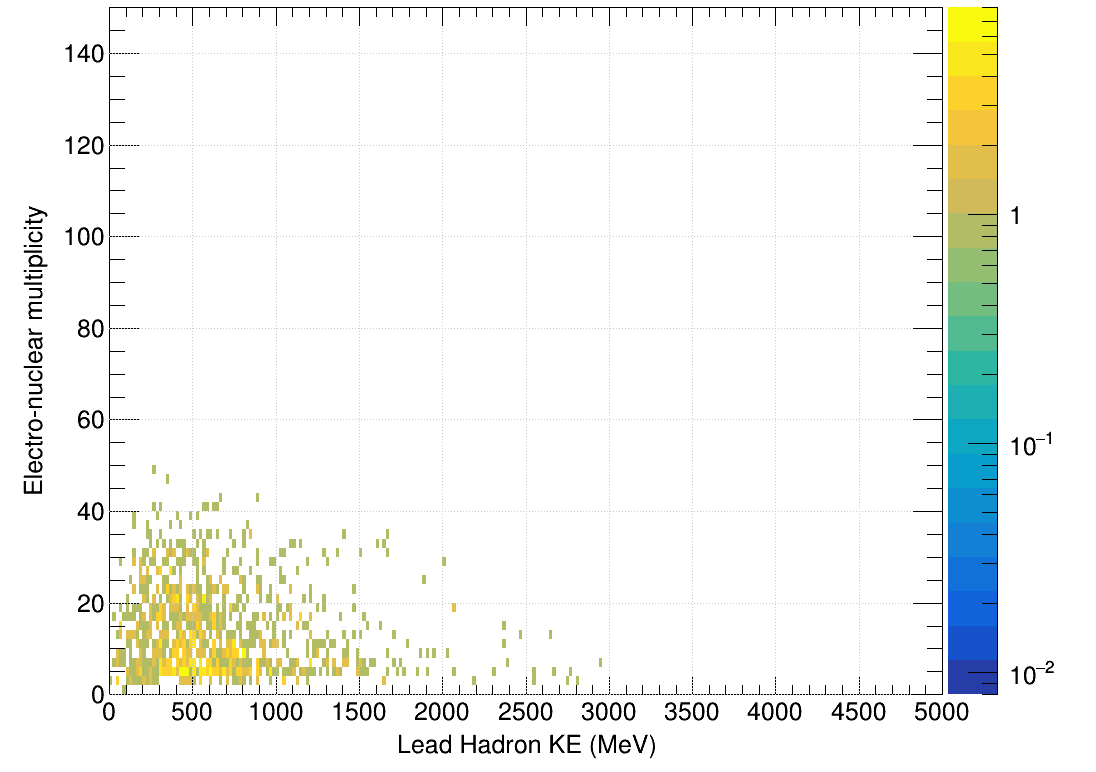

In [35]:
hist = draw_hist2D(en_ntuples['Geant4']['lead_hadron_ke'], en_ntuples['Geant4']['en_particle_mult'], 
                   250, 0, 5000, 75, 0, 150, [q_cut['Geant4'], omega_cut['Geant4'], pt_cut['Geant4']])
hist.Draw("colz")
hist.GetXaxis().SetTitle('Lead Hadron KE (MeV)')
hist.GetYaxis().SetTitle('Electro-nuclear multiplicity')
hist.SetTitle('Geant4')

canvas.SetLogx(0)
canvas.SetLogz(1)
canvas.Draw()